- Reference
  - https://blog.amedama.jp/entry/2019/01/29/235642
  - 回帰問題

In [1]:
import math
import numpy as np
from matplotlib import pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
import xgboost as xgb

In [9]:
#dataset = datasets.load_breast_cancer()
#dataset = datasets.load_iris()
dataset = datasets.load_boston()
X, y = dataset.data, dataset.target

# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.3, shuffle=True, random_state=42, stratify=y)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, shuffle=True, random_state=42,)

In [11]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [12]:
xgb_params = {
#     'objective': 'binary:logistic',
#     'eval_metric': 'logloss',

#     'objective': 'multi:softmax',
#     'num_class': 3,
#     'eval_metric': 'mlogloss',

    'objective': 'reg:linear',
    'eval_metric': 'rmse',
}

evals = [(dtrain, 'train'), (dtest, 'eval')]
evals_result = {}

bst = xgb.train(xgb_params,
                dtrain,
                num_boost_round=1000,
                early_stopping_rounds=10,
                evals=evals,
                evals_result=evals_result)

[04:03:51] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[0]	train-rmse:17.50965	eval-rmse:16.15458
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 10 rounds.
[1]	train-rmse:12.64184	eval-rmse:11.84377
[2]	train-rmse:9.23387	eval-rmse:8.79602
[3]	train-rmse:6.81112	eval-rmse:6.72584
[4]	train-rmse:5.09581	eval-rmse:5.46526
[5]	train-rmse:3.88875	eval-rmse:4.65454
[6]	train-rmse:3.01046	eval-rmse:4.08462
[7]	train-rmse:2.40883	eval-rmse:3.76129
[8]	train-rmse:1.98838	eval-rmse:3.54313
[9]	train-rmse:1.65435	eval-rmse:3.37742
[10]	train-rmse:1.41575	eval-rmse:3.24836
[11]	train-rmse:1.26222	eval-rmse:3.18872
[12]	train-rmse:1.15320	eval-rmse:3.10860
[13]	train-rmse:1.06438	eval-rmse:3.09993
[14]	train-rmse:0.96089	eval-rmse:3.08393
[15]	train-rmse:0.91164	eval-rmse:3.08760
[16]	train-rmse:0.86801	eval-rmse:3.06310


In [13]:
y_pred = bst.predict(dtest)
mse = mean_squared_error(y_test, y_pred)
print('RMSE:', math.sqrt(mse))

RMSE: 3.0332711335356555


In [15]:
print(y_train[:10])

[28.7 21.2 19.3 23.1 19.1 25.  33.4  5.  29.6 18.7]


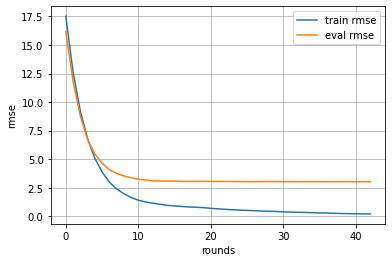

In [16]:
train_metric = evals_result['train']['rmse']
plt.plot(train_metric, label='train rmse')

eval_metric = evals_result['eval']['rmse']
plt.plot(eval_metric, label='eval rmse')

plt.grid()
plt.legend()
plt.xlabel('rounds')
plt.ylabel('rmse')
plt.show()

In [17]:
import seaborn as sns

In [20]:
dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [21]:
import pandas as pd

In [38]:
df_train = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df_train_t = pd.DataFrame(dataset.target, columns=['target'])
df = pd.concat([df_train, df_train_t], axis=1)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [ ]:
#sns.pairplot(df, hue="target", size=2.5)